# ABSTRACT

##### In the code below I have created a function for a quick and compact comparison of the performance of different models for different datasets. 

Make the notebook wider (if you think this makes the notebook look prettier)

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from sklearn.ensemble import RandomForestClassifier
import time
from typing import Iterator, List, Collection, Callable
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
import time
import xgboost
from xgboost import XGBClassifier
import xgboost
import warnings
warnings.filterwarnings('ignore')

## Function to group and plot many classifiers

In [3]:
def pic(X, y, improved_score, improved_time, baseline_score, baseline_time, pattern_score, pattern_time): # besides the data we sholud give 
# to the function results of work improved algorithm and baseline algorithm
    X = X.sample(frac=1, random_state=42)
    y = y[X.index]    
#     X = X.iloc[:100]
#     y = y.iloc[:100]   
    n_train = int(len(X)*0.2)
    n_test = len(X) - n_train
    n_train, n_test
    y_test = y[n_train:]
    
    score_vals = []
    time_arr = []
    time_arr_fixedtrain = []
    classifiers = [DecisionTreeClassifier(max_depth = 3), # list of possible classifiers
                   RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1),
                   XGBClassifier()]
    
    for clf in classifiers: # fitting/predicting/scoring procces for each classifier
        y_preds = []
        time_arr.append([])
        for i in range(n_train, len(X)):
            start_time = time.time()
            clf.fit(X.iloc[:i], y.iloc[:i])
            y_preds.append(clf.predict(pd.DataFrame(X.iloc[[i]])))
            time_arr[-1].append(time.time() - start_time)

        y_preds_fixedtrain = []
        time_arr_fixedtrain.append([]) 
        clf.fit(X.iloc[:n_train], y.iloc[:n_train])
        for i in range(n_train, len(X)):
            start_time = time.time()
            y_preds_fixedtrain.append(clf.predict(pd.DataFrame(X.iloc[[i]])))
            time_arr_fixedtrain[-1].append(time.time() - start_time)

        score_vals_temp = {}
        preds = y_preds
        score_vals_temp['f1_score'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
 
        preds = y_preds_fixedtrain
        score_vals_temp['f1_score_fixedtrain'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
        
        score_vals.append(score_vals_temp)
        
    import matplotlib.pyplot as plt
    plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    # First two plots are for prediction quality comparison

    axs[0][0].set_ylim(0-0.05, 1+0.05)
    axs[0][0].plot(range(n_train + 1, len(X)), score_vals[0]['f1_score'], label='Dec. Tree')
    axs[0][0].plot(range(n_train + 1, len(X)), score_vals[1]['f1_score'], label='XGB')
    axs[0][0].plot(range(n_train + 1, len(X)), score_vals[2]['f1_score'], label='Random Forest')
    axs[0][0].plot(range(n_train + 1, len(X)), improved_score['f1_score'], label='Improved Algo')
    axs[0][0].plot(range(n_train + 1, len(X)), baseline_score['f1_score'], label='Baseline Algo')
    axs[0][0].plot(range(n_train + 1, len(X)), pattern_score, label='Pattern Algo')
    
    # The third plot is for prediction speed comparison
    axs[0,1].plot(range(n_train, len(X)), time_arr[0], label='Dec. Tree')
    axs[0,1].plot(range(n_train, len(X)), time_arr[1], label='XGB')
    axs[0,1].plot(range(n_train, len(X)), time_arr[2], label='Random Forest')
    axs[0,1].plot(range(n_train, len(X)), improved_time, label='Improved Algo')
    axs[0,1].plot(range(n_train, len(X)), baseline_time, label='Baseline Algo')
    axs[0,1].plot(range(n_train, len(X)), pattern_time, label='Pattern Algo')

    # Add labels and titles to the plots
    for (ax, t_verb, dim) in zip(axs.flatten(), ['F1 score', 'Prediction time'], ['','(secs.)']):
        ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
        ax.set_xlabel('# of train examples', loc='right', size=14)
        ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
        ax.legend()

    # Drop the predefined fourth plot since we do not use it
    axs[1,1].set_axis_off()    
    axs[1,0].set_axis_off()  
    # Some postprocessing of plots
    plt.tight_layout()
    plt.subplots_adjust()

    plt.savefig('Classifier_comparison.png')
    plt.show()

In [4]:
def pattern_struc(X, y, empty_df):
    categorical_columns = [c for c in X.columns 
                             if df[c].dtype.name == 'object']
    numerical_columns = [c for c in X.columns 
                           if df[c].dtype.name != 'object']
#     print('categorical_columns ', categorical_columns)
#     print('numerical_columns ', numerical_columns)
    n_train = int(len(X)*0.2)
    n_test = len(X) - n_train
    y_test = y[n_train:]
    

    ans_array = [0] * len(y_test)
    time_arr = [0] * len(y_test)
    counter = -1
    for i in range(n_train, len(X)):
        t_start = time.time()
        X_train = X[:n_train] 
        y_train = y[:n_train]
        x_test = X.iloc[i]
        counter += 1
        for idx_train, x_train in X_train.iterrows():
            extent = []
            intsec = lpipe.compute_intsec(x_test, x_train, empty_df, categorical_columns, numerical_columns)
            for idx_examp, x_examp in X_train.iterrows():
                if lpipe.comapre(intsec, x_examp, categorical_columns, numerical_columns) == True:
                    extent.append(y_train[idx_examp])
                    if extent[0] != extent[-1]:
                        break
#                     if extent[0] != extent[-1]:
#                         if mega_counter > 10:
#                             break
#                         else:
#                             mega_counter += 1
            else:
                ans_array[counter] = extent[0]
                time_arr[counter] = (time.time() - t_start)
                break
#     print(y_test)
#     print(ans_array)
    return [[f1_score(y_test[:i], ans_array[:i]) for i in range(1, len(ans_array))], time_arr]   

Import the library with all predefine functions

In [5]:
import updated_lazy_pipeline as lpipe

Check library versions

In [6]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.7.15
1.3.5
1.0.2


Run seamlessly on 
* python = 3.9.13, 
* pandas = 1.5.1
* scikit-learn = 1.1.3

### NOTE: This code contains nothing new compare with lazy_fca.ipynb from github. All big changes are in the lazy_pipeline.py. 

# DATASET 1 (Customertravel)

Load data

In [7]:
df = pd.read_csv('D:/Рабочий стол/Univer/Datasets/Customertravel.csv', sep=',')
# df = df.iloc[:100]
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [8]:
y_name = 'Target'

Binarize data for baseline and improved algorithms:

In [9]:
y = df[y_name] 
X = lpipe.binarize_X(df.drop(y_name, axis=1))

Binarize data for classifiers:

In [10]:
b_df = pd.get_dummies(df, columns=['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'])
y_for_clf = b_df[y_name]
X_for_clf = b_df.drop(y_name, axis = 1)

In [11]:
y_for_pattern = df[y_name]
X_for_pattern = df.drop(y_name, axis = 1)
empty_df = {'Age': [[0,0]], 'FrequentFlyer':['non'] , 'AnnualIncomeClass': ['non'], 
            'ServicesOpted':[[0,0]] , 'AccountSyncedToSocialMedia ': ['non'], 
            'BookedHotelOrNot':['non']}

In [12]:
X.columns

Index(['Age: 27', 'Age: 28', 'Age: 29', 'Age: 30', 'Age: 31', 'Age: 33',
       'Age: 34', 'Age: 35', 'Age: 36', 'Age: 37', 'Age: 38',
       'FrequentFlyer: No', 'FrequentFlyer: No Record', 'FrequentFlyer: Yes',
       'AnnualIncomeClass: High Income', 'AnnualIncomeClass: Low Income',
       'AnnualIncomeClass: Middle Income', 'ServicesOpted: 1',
       'ServicesOpted: 2', 'ServicesOpted: 3', 'ServicesOpted: 4',
       'ServicesOpted: 5', 'ServicesOpted: 6',
       'AccountSyncedToSocialMedia: No', 'AccountSyncedToSocialMedia: Yes',
       'BookedHotelOrNot: No', 'BookedHotelOrNot: Yes'],
      dtype='object')

Shuffle the data to drop any initial ordering of rows. For example, if the dataset is constructed first from all positive examples and then all negative examples.

_NB: Skip this step if your data is sequential and rows ordering is important. For example, if your dataset contains a "date" feature._

In [13]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X
# X = X.iloc[:100]
# y = y.iloc[:100]

Represent data $X$ as list of subsets of attributes to better suit the theory.

In [14]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'AccountSyncedToSocialMedia: Yes',
 'Age: 33',
 'AnnualIncomeClass: Low Income',
 'BookedHotelOrNot: No',
 'FrequentFlyer: No Record',
 'ServicesOpted: 2'}

And, for being consisted, convert $y$ to list too.

In [15]:
y = y.values.tolist()

Assume that at the very begining, we know the labels only for the first 20% of rows.

In [16]:
n_train = int(len(X)*0.2)
n_test = len(X) - n_train
n_train, n_test

(190, 764)

Set up the test target labels $y$

In [17]:
y_test = y[n_train:]

# Make predictions for improved baseline algorithm
With next functions from lazy_pipline.py:improved_predict_array, improved_predict_with_generators

In [18]:
%%time
# Кол во тренировочных примеров увеличивается
gen = lpipe.improved_predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, improved_t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████████████████████████████████████████████████| 954/954 [00:03<00:00, 202.55it/s]

Wall time: 3.77 s


In [19]:
%%time
# Кол во тренировочных примеров не изменяется
gen = list(lpipe.improved_predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, improved_t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 954/954 [00:00<00:00, 1335.36it/s]

Wall time: 573 ms


In [20]:
improved_score = {}
preds = y_preds
improved_score['f1_score'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
preds = y_preds_fixedtrain
improved_score['f1_score_fixedtrain'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Make predictions for baseline algorithm
With next functions from lazy_pipline.py: predict_array, predict_with_generators

In [21]:
%%time
# Кол во тренировочных примеров увеличивается
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|███████████████████████████████████████████████████████| 954/954 [00:13<00:00, 55.26it/s]

Wall time: 13.8 s


In [22]:
%%time
# Кол во тренировочных примеров не изменяется
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████████████████████████████████████████████████| 954/954 [00:01<00:00, 626.09it/s]

Wall time: 1.22 s


In [23]:
baseline_score = {}
preds = y_preds
baseline_score['f1_score'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
preds = y_preds_fixedtrain
baseline_score['f1_score_fixedtrain'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Make predictions for pattern algorithm

In [24]:
pattern_info = pattern_struc(X_for_pattern, y_for_pattern, empty_df)

# Analyze results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[05:18:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:18:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:18:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:18:57] WARNING:

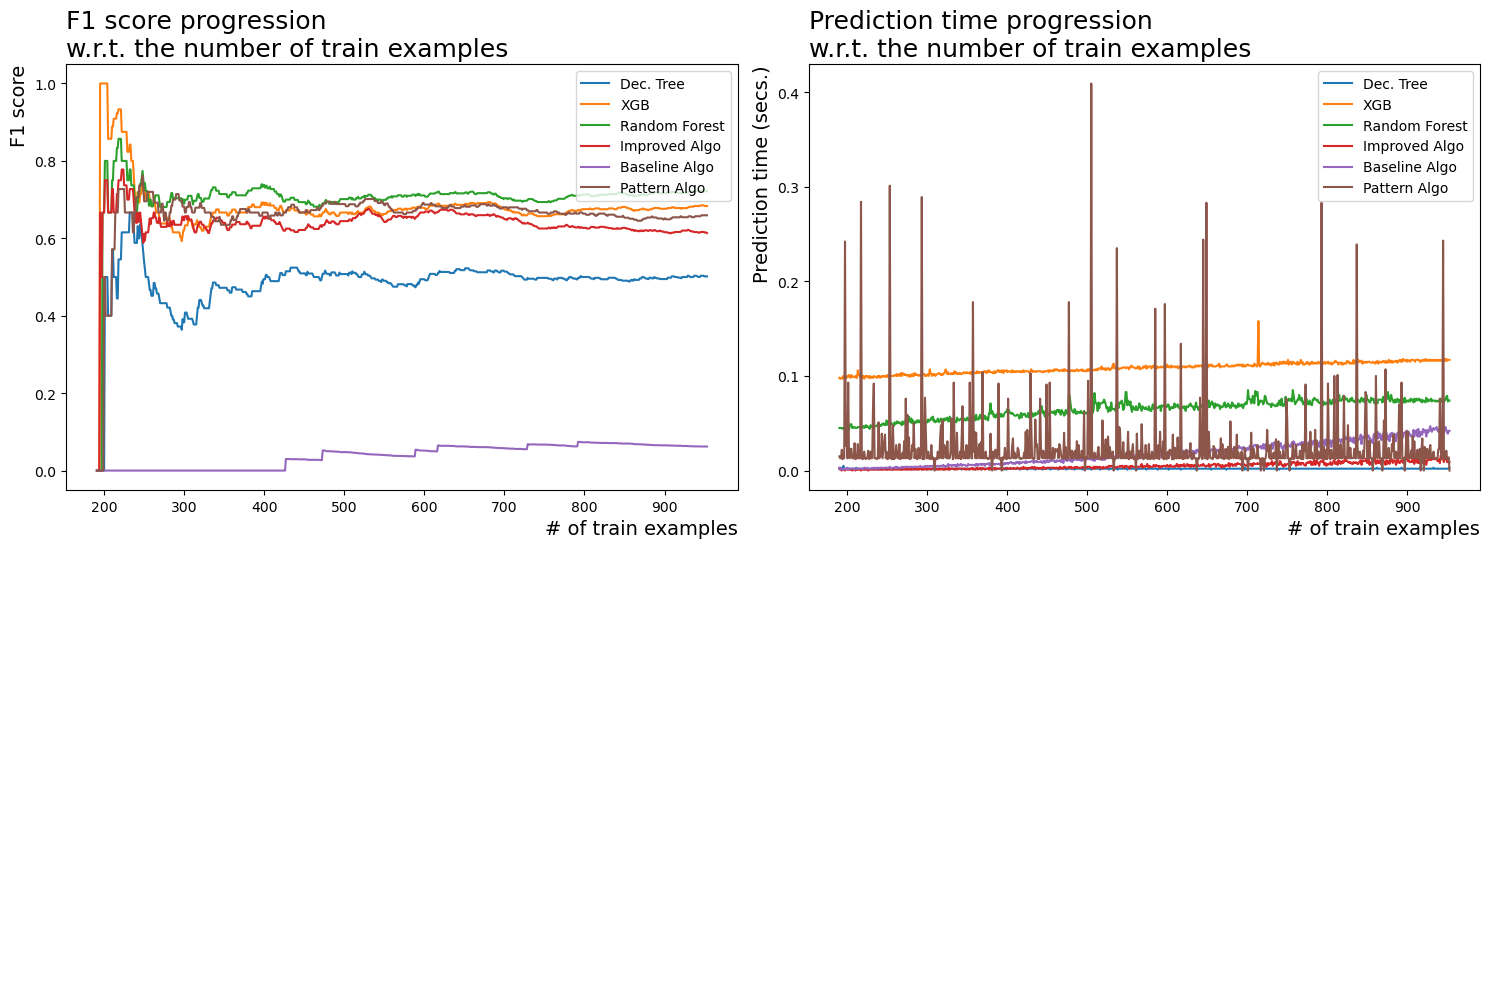

In [25]:
pic(X = X_for_clf, y = y_for_clf, improved_score = improved_score, improved_time = improved_t_preds, 
    baseline_score = baseline_score, baseline_time = t_preds, pattern_score = pattern_info[0], pattern_time = pattern_info[1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[05:21:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:21:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:21:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:21:28] WARNING:

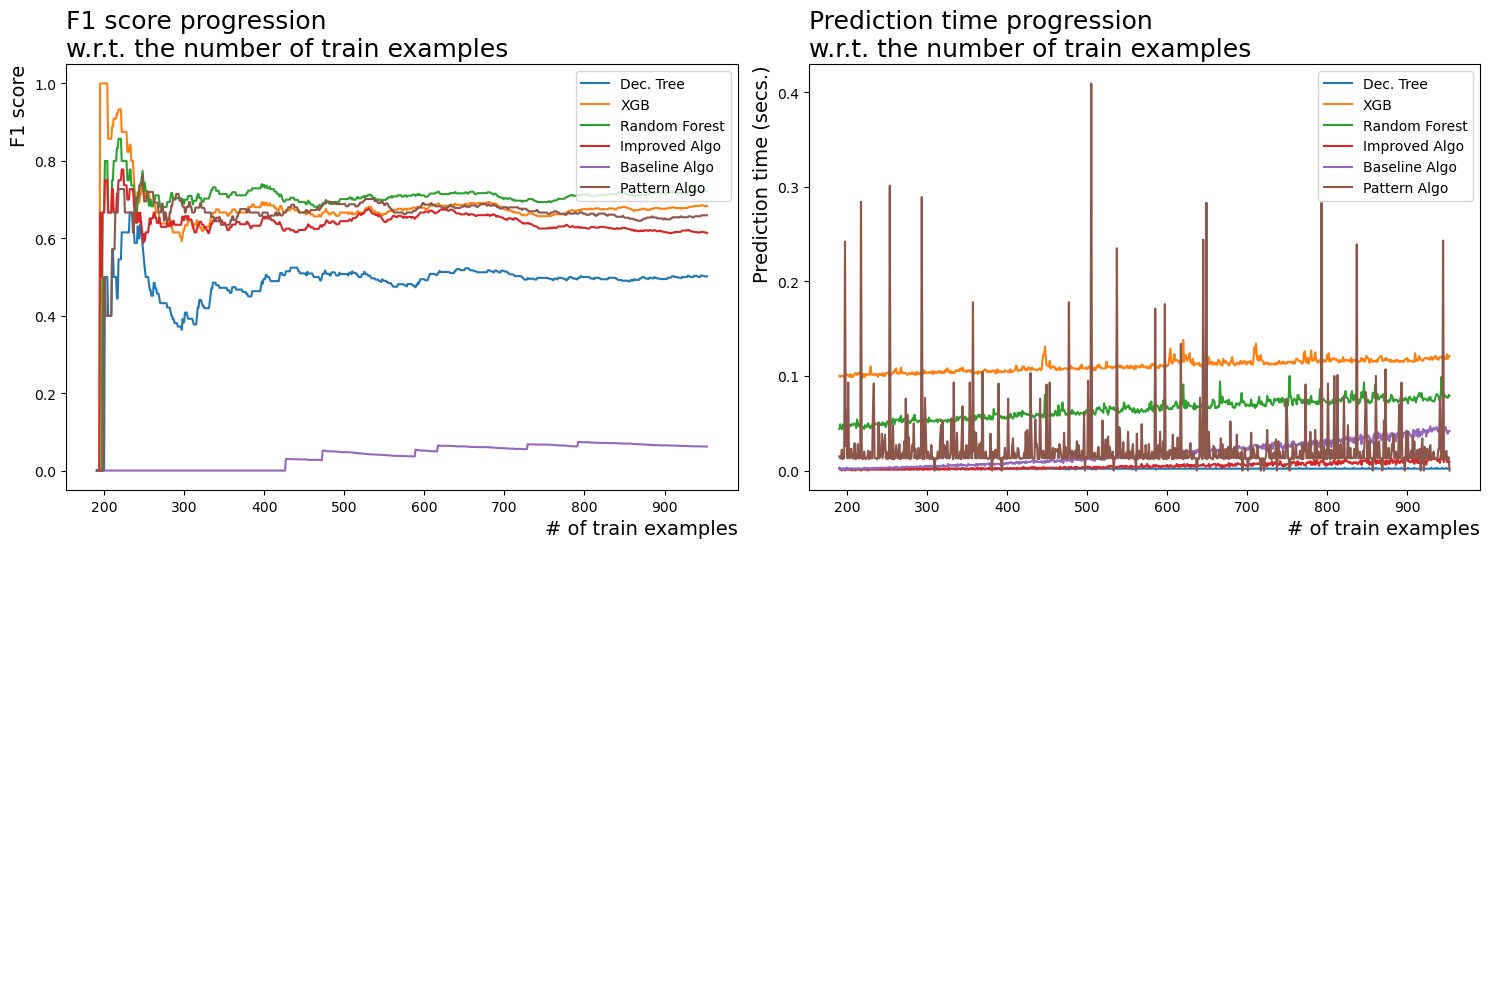

In [26]:
pic(X = X_for_clf, y = y_for_clf, improved_score = improved_score, improved_time = improved_t_preds, 
    baseline_score = baseline_score, baseline_time = t_preds, pattern_score = pattern_info[0], pattern_time = pattern_info[1])

# DATASET 2

In [27]:
df = pd.read_csv('D:/Рабочий стол/Univer/Datasets/heart.csv', sep=',')
df = df.sample(frac=1, random_state=42)
# df = df.iloc[:100]
b_df = df
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [28]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [29]:
y_name = 'output'

In [30]:
y = df[y_name] 
X = lpipe.binarize_X(df.drop(y_name, axis=1))

y_for_clf = b_df[y_name]
X_for_clf = b_df.drop(y_name, axis = 1)

In [31]:
y_for_pattern = df[y_name]
X_for_pattern = df.drop(y_name, axis = 1)
empty_df = {'age': [[0,0]], 'sex': [[0,0]],'cp': [[0,0]],
            'trtbps': [[0,0]],'chol': [[0,0]],'fbs': [[0,0]],'restecg': [[0,0]],
           'thalachh': [[0,0]],'exng': [[0,0]],'oldpeak': [[0,0]],'slp': [[0,0]],
           'caa': [[0,0]],'thall': [[0,0]]}

In [32]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
y = y.values.tolist()

In [33]:
n_train = int(len(X)*0.2)
n_test = len(X) - n_train
n_train, n_test
y_test = y[n_train:]

# Make predictions for improved baseline algorithm

In [34]:
%%time
# Кол во тренировочных примеров увеличивается
gen = lpipe.improved_predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, improved_t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████████████████████████████████████████████████| 303/303 [00:00<00:00, 493.79it/s]

Wall time: 495 ms


In [35]:
%%time
# Кол во тренировочных примеров не изменяется
gen = list(lpipe.improved_predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, improved_t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 303/303 [00:00<00:00, 2557.35it/s]

Wall time: 96 ms


In [36]:
improved_score = {}
preds = y_preds
improved_score['f1_score'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
preds = y_preds_fixedtrain
improved_score['f1_score_fixedtrain'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Make predictions for baseline algorithm

In [37]:
%%time
# Кол во тренировочных примеров увеличивается
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████████████████████████████████████████████████| 303/303 [00:00<00:00, 278.61it/s]

Wall time: 874 ms


In [38]:
%%time
# Кол во тренировочных примеров не изменяется
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 303/303 [00:00<00:00, 2612.31it/s]

Wall time: 94 ms


In [39]:
baseline_score = {}
preds = y_preds
baseline_score['f1_score'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
preds = y_preds_fixedtrain
baseline_score['f1_score_fixedtrain'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Make predictions for pattern algorithm

In [40]:
pattern_info = pattern_struc(X_for_pattern, y_for_pattern, empty_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[05:22:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:22:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:22:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:22:54] WARNING:

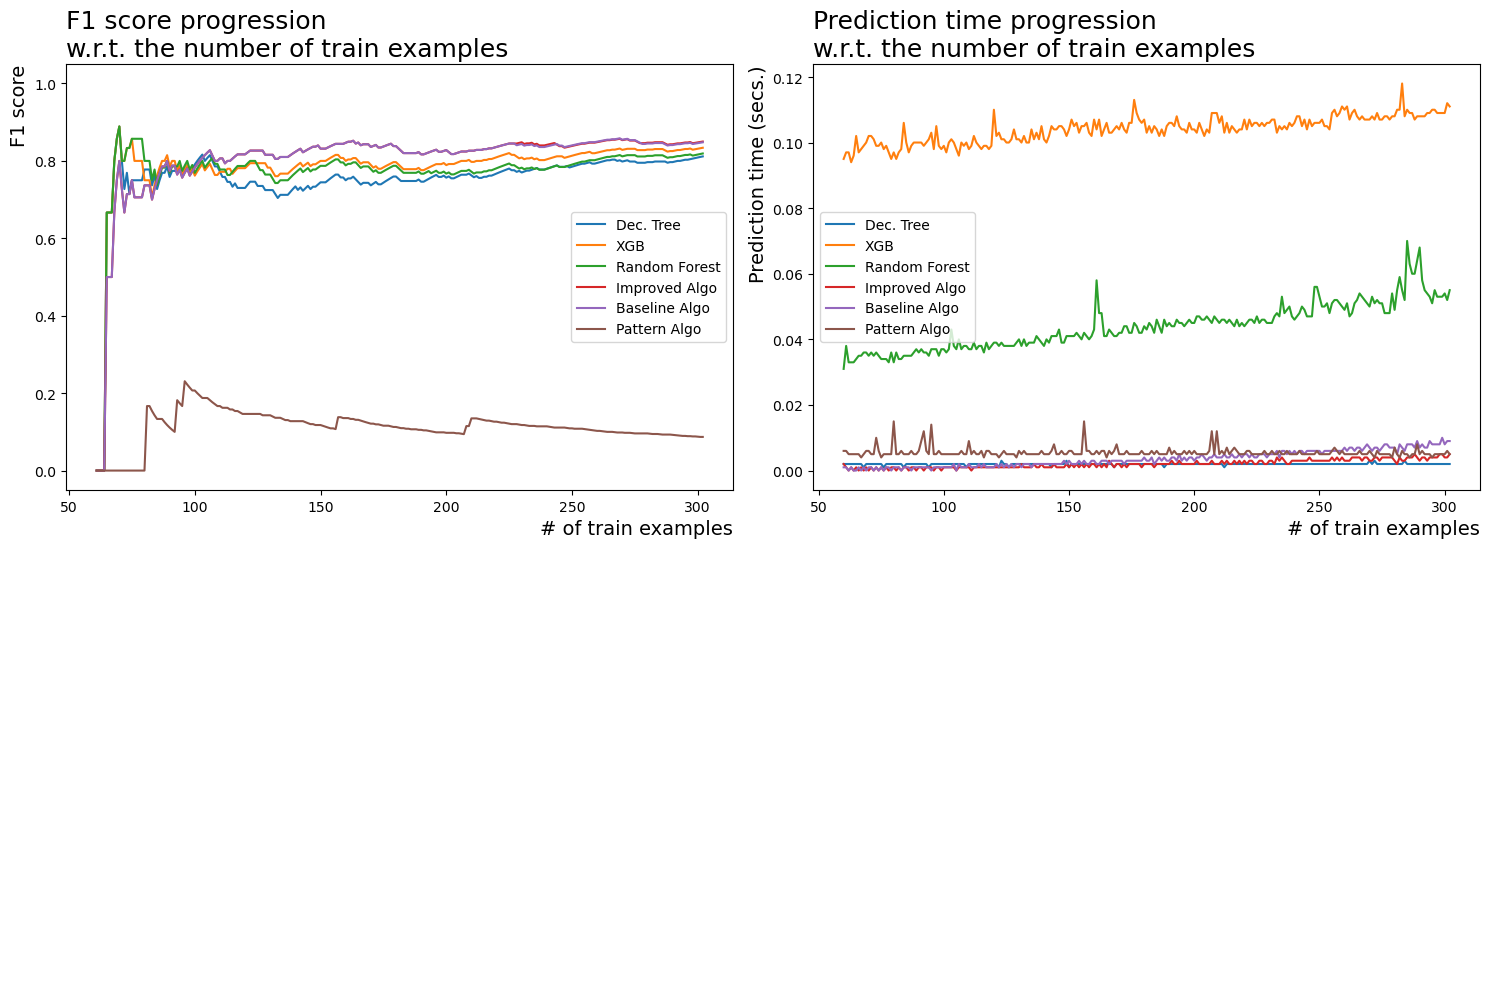

In [41]:
pic(X = X_for_clf, y = y_for_clf, improved_score = improved_score, improved_time = improved_t_preds, 
    baseline_score = baseline_score, baseline_time = t_preds, pattern_score = pattern_info[0], pattern_time = pattern_info[1])

# DATASET 3

In [42]:
df = pd.read_csv('D:/Рабочий стол/Univer/Datasets/data.csv', sep=',')
# df = df.iloc[:100]
y_name = 'will_go_to_college'
b_df = df
b_df = pd.get_dummies(df, columns=['type_school', 'school_accreditation', 'gender', 'interest', 'residence', 'parent_was_in_college'])
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [43]:
y = df[y_name] 
X = lpipe.binarize_X(df.drop(y_name, axis=1))

y_for_clf = b_df[y_name]
X_for_clf = b_df.drop(y_name, axis = 1)

In [44]:
y_for_pattern = df[y_name]
X_for_pattern = df.drop(y_name, axis = 1)
empty_df = {'type_school': ['non'], 'school_accreditation':['non'] , 'gender': ['non'], 
            'interest':['non'] , 'residence': ['non'], 
            'parent_age': [[0,0]], 'parent_salary': [[0,0]], 'house_area':[[0,0]] , 'average_grades': [[0,0]], 
            'parent_was_in_college':['non']}

In [45]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
y = y.values.tolist()

In [46]:
n_train = int(len(X)*0.2)
n_test = len(X) - n_train
n_train, n_test
y_test = y[n_train:]

# Make predictions for improved baseline algorithm

In [47]:
%%time
# Кол во тренировочных примеров увеличивается
gen = lpipe.improved_predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, improved_t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 88.18it/s]

Wall time: 9.07 s


In [48]:
%%time
# Кол во тренировочных примеров не изменяется
gen = list(lpipe.improved_predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, improved_t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 650.79it/s]

Wall time: 1.23 s


In [49]:
improved_score = {}
preds = y_preds
improved_score['f1_score'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
preds = y_preds_fixedtrain
improved_score['f1_score_fixedtrain'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Make predictions for baseline algorithm

In [50]:
%%time
# Кол во тренировочных примеров увеличивается
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 31.40it/s]

Wall time: 25.5 s


In [51]:
%%time
# Кол во тренировочных примеров не изменяется
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 309.77it/s]

Wall time: 2.59 s


In [52]:
baseline_score = {}
preds = y_preds
baseline_score['f1_score'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]
preds = y_preds_fixedtrain
baseline_score['f1_score_fixedtrain'] = [f1_score(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Make predictions for pattern algorithm

In [53]:
pattern_info = pattern_struc(X_for_pattern, y_for_pattern, empty_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[05:25:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:25:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:25:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:25:55] WARNING:

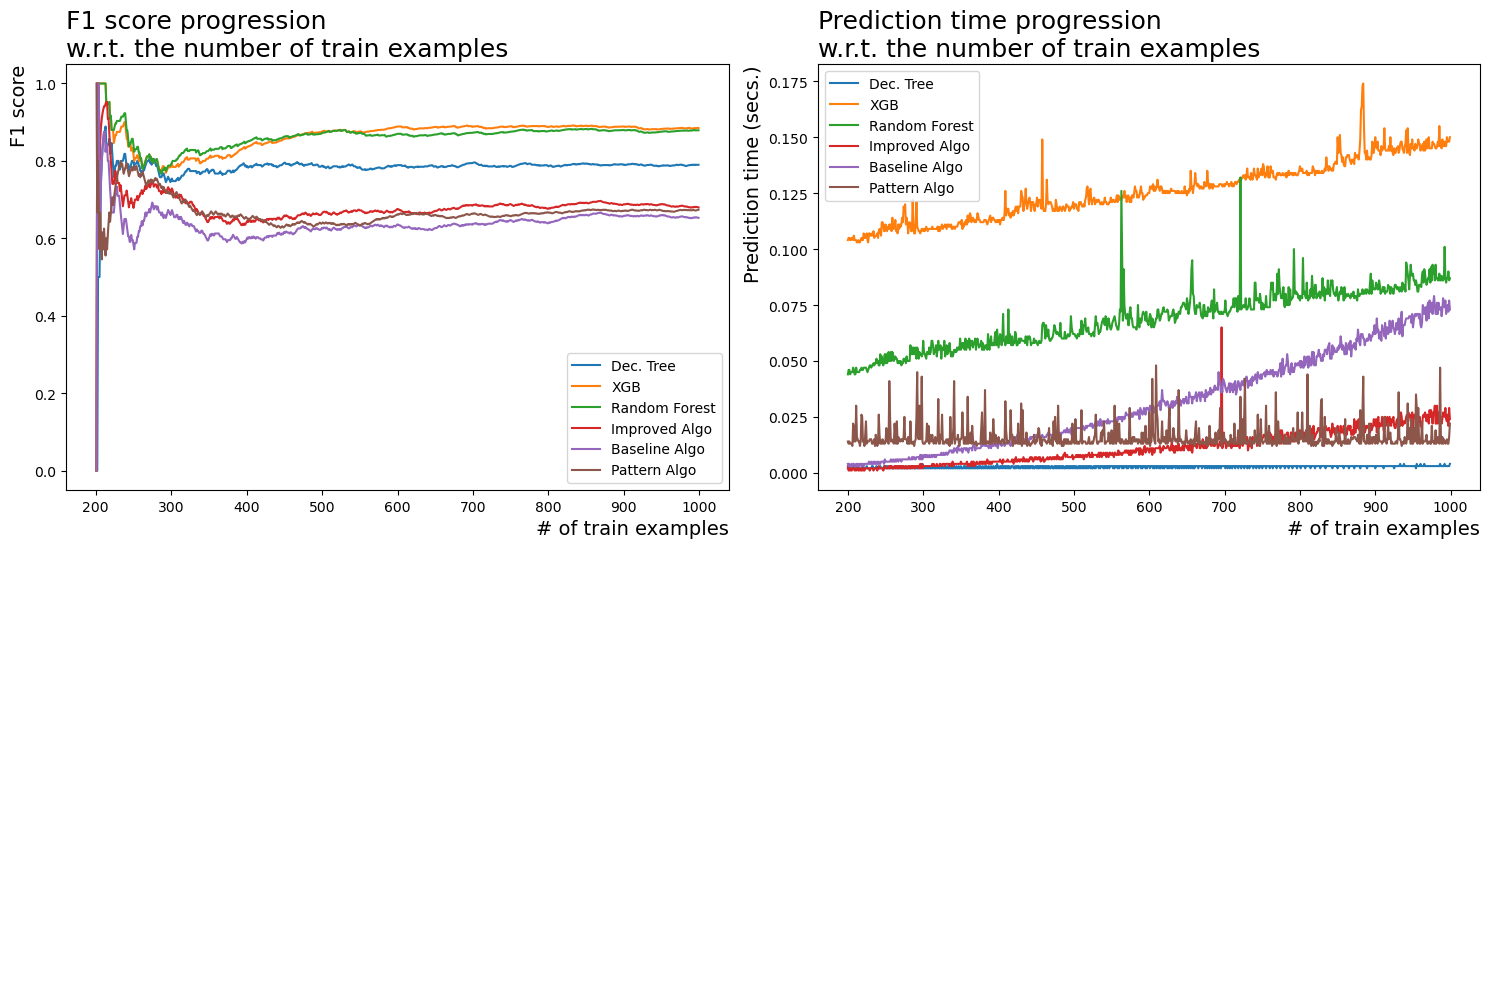

In [54]:
pic(X = X_for_clf, y = y_for_clf, improved_score = improved_score, improved_time = improved_t_preds, 
    baseline_score = baseline_score, baseline_time = t_preds, pattern_score = pattern_info[0], pattern_time = pattern_info[1])

In conclusion:

...